<a href="https://colab.research.google.com/github/Argha28/Differential_Gene_expression/blob/main/Differential_Gene_Expression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing a file from Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ML_DATASETS/cancer_gene_expression.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of      gene_1    gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8  \
0       0.0  0.000000     0.0  2.088413     0.0     0.0     0.0     0.0   
1       0.0  0.000000     0.0  3.205955     0.0     0.0     0.0     0.0   
2       0.0  0.000000     0.0  4.746646     0.0     0.0     0.0     0.0   
3       0.0  0.000000     0.0  1.173191     0.0     0.0     0.0     0.0   
4       0.0  0.000000     0.0  1.366532     0.0     0.0     0.0     0.0   
..      ...       ...     ...       ...     ...     ...     ...     ...   
796     0.0  2.933384     0.0  1.683921     0.0     0.0     0.0     0.0   
797     0.0  0.000000     0.0  2.772625     0.0     0.0     0.0     0.0   
798     0.0  0.408277     0.0  1.854754     0.0     0.0     0.0     0.0   
799     0.0  0.639232     0.0  3.226971     0.0     0.0     0.0     0.0   
800     0.0  0.000000     0.0  2.336912     0.0     0.0     0.0     0.0   

       gene_9   gene_10  ...  gene_7992  gene_7993  gene_7994  gene_7995  \
0    0.550605  2.815760  ...  11.558803   8.881802   6.014840   6.643534   
1    0.425244  2.354396  ...  11.062829   9.032864   5.054193   6.432320   
2    2.639417  1.657091  ...  12.497640   7.198160   0.943434   7.371690   
3    1.527371  2.732899  ...  11.261713   8.725676   6.300418   6.036451   
4    0.000000  3.388355  ...  12.241965   7.685204   5.142948   6.355788   
..        ...       ...  ...        ...        ...        ...        ...   
796  0.635336  1.252839  ...   9.985842   9.469967   4.225275   6.955336   
797  0.534759  3.761764  ...  12.334681   8.157327   1.482797   6.758183   
798  0.000000  0.986520  ...  11.671992   8.859616   6.393828   6.427115   
799  1.921322  0.639232  ...  12.237087   5.753976   4.192478   6.614875   
800  0.926379  1.233090  ...  11.086966   8.345086   7.789018   6.472460   

     gene_7996  gene_7997  gene_7998  gene_7999  gene_8000  Cancer_Type  
0    11.740624   7.065012   9.932659   6.928584   2.088413         KIRC  
1    12.104985   7.300746   9.872796   5.039231   2.448002         KIRC  
2    11.202356   8.426588  11.176890   3.119738   4.433988         BRCA  
3    11.732303   7.559469   9.596453   2.863046   3.380342         KIRC  
4    11.493950   8.139444  10.189256   6.544487   0.839395         COAD  
..         ...        ...        ...        ...        ...          ...  
796  11.722206   7.309940  10.986119   6.396848   1.252839         BRCA  
797  11.403838   9.005347  11.012045   5.386625   1.697640         COAD  
798  11.596586   7.454127  10.718533   5.507417   1.398131         BRCA  
799  11.183245   7.544261  10.649382   5.282158   0.639232         BRCA  
800  11.819836   8.082942  10.397717   7.550000   0.926379         COAD  

[801 rows x 8001 columns]>

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


#Machine Learning for Cancer Prediction
#The data is an rna seq gene expression data for different cancer types
#The rows represent cancer samples and the column represents gene count values

In [ ]:
#Data handling

import numpy as np
import pandas as pd

#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score


In [ ]:
dataframe = pd.read_csv(path)

In [ ]:
dataframe.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [ ]:
print(dataframe.shape)

(801, 8001)


In [ ]:
#Checking the target of the dataframe
dataframe.columns[-1]

'Cancer_Type'

In [ ]:
#Checking the null or missing values in our data
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
#Checking different cancer types in our data
print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


<Axes: xlabel='Cancer_Type'>

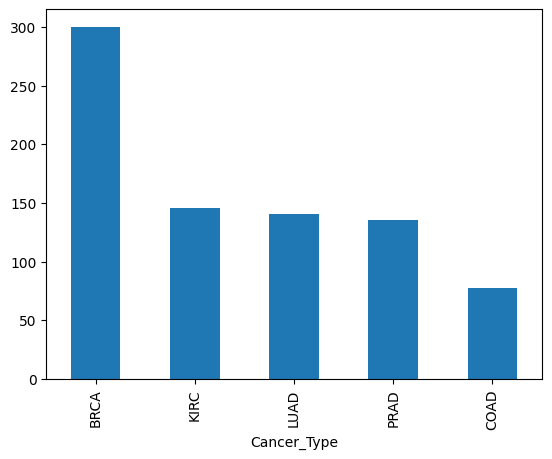

In [ ]:
#plot a bar chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot.bar()

#Data Preprocessing

In [ ]:
# We will now separate the feature values from the class
x = dataframe.iloc[:,0:-1]
y = dataframe.iloc[:,-1]

In [ ]:
print(x.shape)
print(y.shape)

(801, 8000)
(801,)


#Label Encode

In [ ]:
#The label for this data is in a categorical form .Therefore we have to convert them into numerical format
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [ ]:
classes

array([0, 1, 2, 3, 4])

#Data Splitting

In [ ]:
#split data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [ ]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


#Data Normalization

In [ ]:
#Data normalization is done so that values are in the same range
min_max_scaler=MinMaxScaler()
x_train_norm=min_max_scaler.fit_transform(x_train)
x_test_norm=min_max_scaler.fit_transform(x_test)

#Feature Selection

In [ ]:
#Mutual information algorithm is used for the selection of the features which will be used to train our model
MI=mutual_info_classif(x_train_norm,y_train)

In [ ]:
#We have selcted top n features
n_features=400
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [ ]:
x_train_selected=x_train_norm[:,selected_scores_indices]
x_test_selected=x_test_norm[:,selected_scores_indices]

In [ ]:
print(x_train_selected.shape)
print(x_test_selected.shape)

(640, 400)
(161, 400)


#Training the model using clssifier

In [ ]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(x_train_selected,y_train)
y_pred =RF.predict(x_test_selected)
pred_prob = RF.predict_proba(x_test_selected)

# Model Prediction

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9637
precision:0.9758
recall:0.9752
f1score:0.9750


classification report


              precision    recall  f1-score   support

        BRCA       0.95      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      0.96      0.98        28
        LUAD       0.96      0.92      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.98       161



In [ ]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,15,0,1,0
KIRC,1,0,27,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

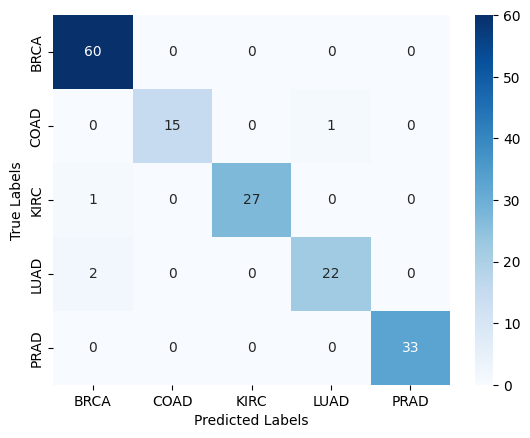

In [ ]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

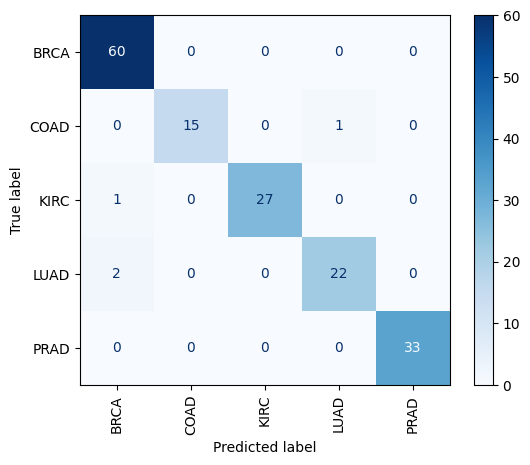

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()